In [38]:
# Importing elements of fuzzy controller
from Fuzzy import Term, Function, Defuzzifier

import numpy as np
import matplotlib.pyplot as plt

## First question

In [46]:
tempreture = {'low':Term(Function('tri', a=20-10e-5, b=20+10e-8, c=30)),
              'mid':Term(Function('tri', a=25, b=40, c=50)),
              'high':Term(Function('tri', a=40, b=70, c=70+10e-5))
              }

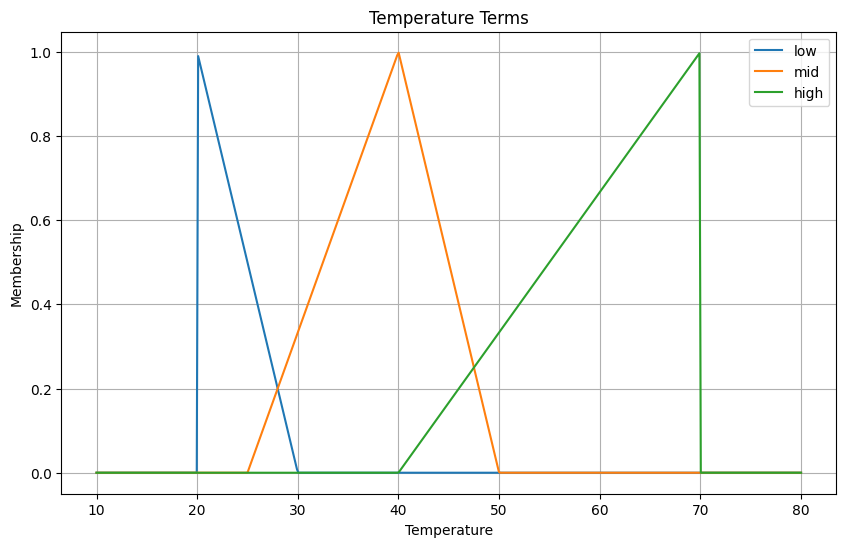

In [47]:
x = np.linspace(10, 80, 500)

plt.figure(figsize=(10, 6))

for label, term in tempreture.items():
    y = [term(xi).v for xi in x]  # Assuming 'value' is the attribute that returns the numerical value
    plt.plot(x, y, label=label)

plt.title('Temperature Terms')
plt.xlabel('Temperature')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

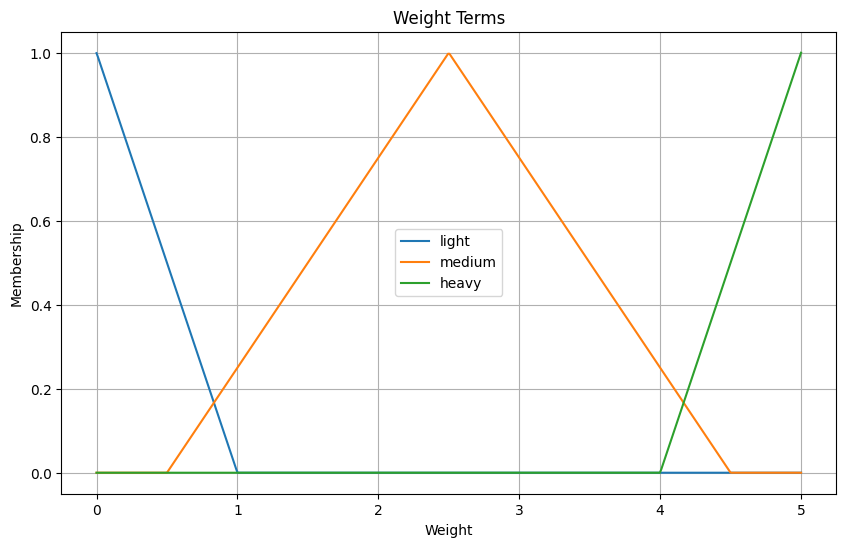

In [48]:
weight = {'light': Term(Function('tri', a=0-10e-5, b=0+10e-8, c=1)),
          'medium': Term(Function('tri', a=0.5, b=2.5, c=4.5)),
          'heavy': Term(Function('tri', a=4, b=5, c=5+10e-5))
          }

x_weight = np.linspace(0, 5, 500)

plt.figure(figsize=(10, 6))

for label, term in weight.items():
    y_weight = [term(xi).v for xi in x_weight]  # Assuming 'value' is the attribute that returns the numerical value
    plt.plot(x_weight, y_weight, label=label)

plt.title('Weight Terms')
plt.xlabel('Weight')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

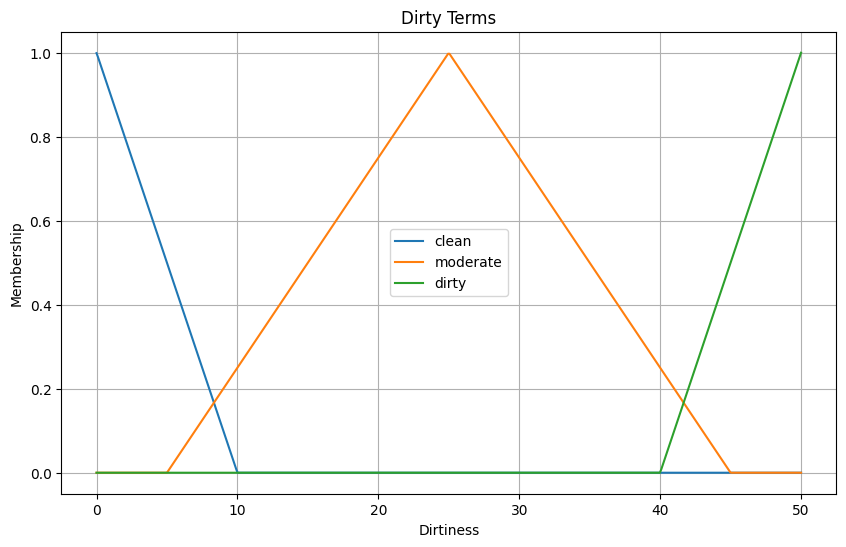

In [49]:
dirty = {'clean': Term(Function('tri', a=0-10e-5, b=0+10e-8, c=10)),
         'moderate': Term(Function('tri', a=5, b=25, c=45)),
         'dirty': Term(Function('tri', a=40, b=50, c=50+10e-5))
         }

x_dirty = np.linspace(0, 50, 500)

plt.figure(figsize=(10, 6))

for label, term in dirty.items():
    y_dirty = [term(xi).v for xi in x_dirty]  # Assuming 'value' is the attribute that returns the numerical value
    plt.plot(x_dirty, y_dirty, label=label)

plt.title('Dirty Terms')
plt.xlabel('Dirtiness')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

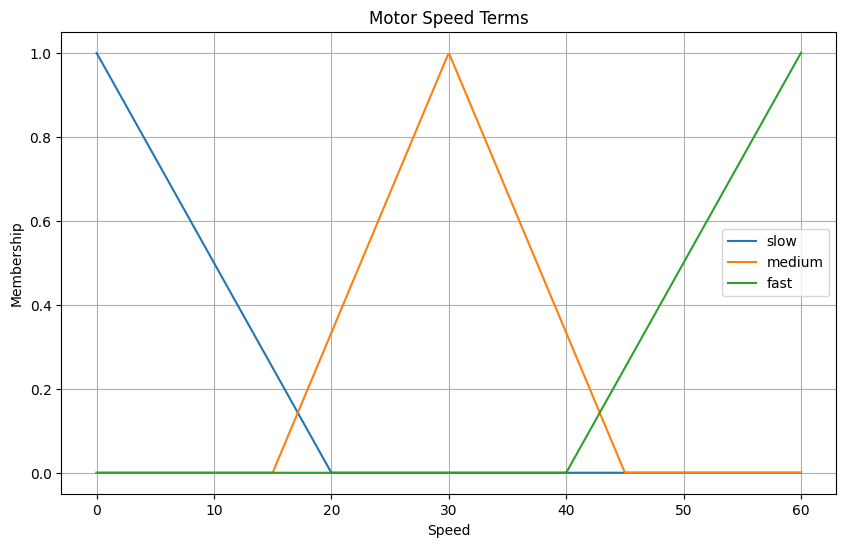

In [50]:
motor_speed = {'slow': Term(Function('tri', a=0-10e-5, b=0+10e-8, c=20)),
               'medium': Term(Function('tri', a=15, b=30, c=45)),
               'fast': Term(Function('tri', a=40, b=60, c=60+10e-5))
              }

x_motor_speed = np.linspace(0, 60, 500)

plt.figure(figsize=(10, 6))

for label, term in motor_speed.items():
    y_motor_speed = [term(xi).v for xi in x_motor_speed]  # Assuming 'value' is the attribute that returns the numerical value
    plt.plot(x_motor_speed, y_motor_speed, label=label)

plt.title('Motor Speed Terms')
plt.xlabel('Speed')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

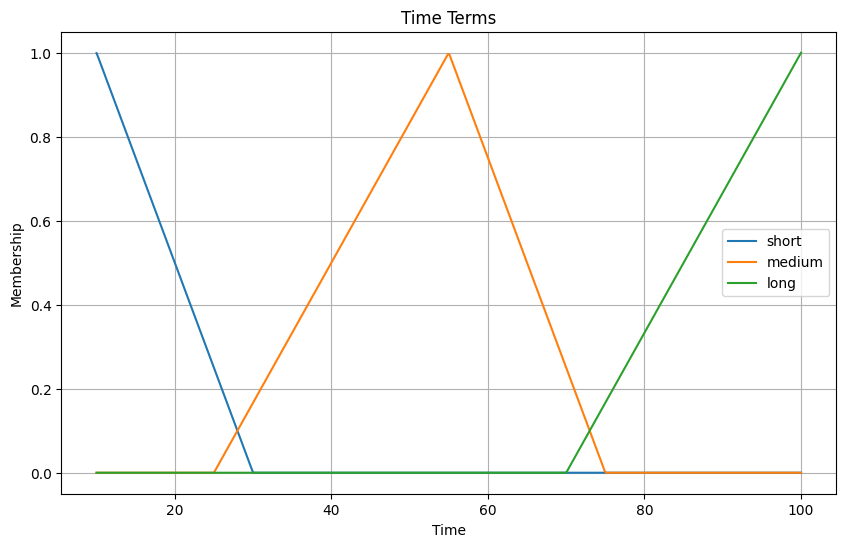

In [51]:
time = {'short': Term(Function('tri', a=10-10e-5, b=10+10e-8, c=30)),
    'medium': Term(Function('tri', a=25, b=55, c=75)),
    'long': Term(Function('tri', a=70, b=100, c=100+10e-5))
       }

x_time = np.linspace(10, 100, 500)

plt.figure(figsize=(10, 6))

for label, term in time.items():
    y_time = [term(xi).v for xi in x_time]  # Assuming 'value' is the attribute that returns the numerical value
    plt.plot(x_time, y_time, label=label)

plt.title('Time Terms')
plt.xlabel('Time')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# rule set
rule1_engine = motor_speed['fast'] << -dirty['dirty'](45) * weight['light'](4) * tempreture['low'](20)
rule1_time = time['short'] << -dirty['dirty'](45) * weight['light'](4) * tempreture['low'](20)

rule2_engine = +motor_speed['fast'] << -dirty['dirty'](45) * weight['medium'](4) * tempreture['low'](20)
rule2_time = time['medium'] << -dirty['dirty'](45) * weight['medium'](4) * tempreture['low'](20)

rule3_engine = motor_speed['fast'] << dirty['dirty'](45) * weight['light'](4) * tempreture['low'](20)
rule3_time = +time['long'] << dirty['dirty'](45) * weight['light'](4) * tempreture['low'](20)

rule4_engine = -motor_speed['slow'] << +dirty['dirty'](45) * weight['heavy'](4) * tempreture['mid'](20)
rule4_time = +time['long'] << +dirty['dirty'](45) * weight['heavy'](4) * tempreture['mid'](20)

rule5_engine = -motor_speed['fast'] << dirty['dirty'](45) * weight['heavy'](4) * tempreture['high'](20)
rule5_time = -time['long'] << dirty['dirty'](45) * weight['heavy'](4) * tempreture['high'](20)

rule6_engine = +motor_speed['fast'] << +dirty['dirty'](45) * weight['heavy'](4) * tempreture['low'](20)
rule6_time = +time['long'] << +dirty['dirty'](45) * weight['heavy'](4) * tempreture['low'](20)


In [56]:
defuzzifier = Defuzzifier('mom')

In [57]:
rules = [rule1_engine, rule2_engine, rule3_engine, rule4_engine, rule5_engine, rule6_engine]
defuzzifier(rules)

50.0010501050105
54.99957494749475
50.0010501050105
10.000950105010501
50.0010501050105
50.0010501050105


44.167454245424544

In [58]:
time_rules = [rule1_time, rule2_time, rule3_time, rule4_time, rule5_time, rule6_time]
defuzzifier(time_rules)

20.000950105010503
51.25262526252625
85.00155015501551
85.00155015501551
85.00155015501551
85.00155015501551


68.54329599793313